## import library

In [106]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

pengambilan data csv

In [107]:
# pengambilan data
insurance = pd.read_csv(os.getcwd() + "/insurance.csv")

# melihat data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


melihat informasi dari kolom data

In [108]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


perhitungan data yang kosong (hasilnya tidak ada yang kosong)

In [109]:
insurance.isna().count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [110]:
# melihat data unik 
insurance['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

encoding (menjadi kategorikal / indexing)

In [111]:
# menjadikan categorical menjadi numerik
insurance.replace({'sex': {'male': 0, 'female': 1}}, inplace=True)
insurance.replace({'smoker': {'no': 0, 'yes': 1}}, inplace=True)
insurance.replace({'region': {'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3}}, inplace=True)

# jikalau menggunakan one-hot-encoding
# insurance = pd.get_dummies(insurance)

In [112]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


menampilkan berat data antara kolom satu dengan kolom lainnya

<Axes: >

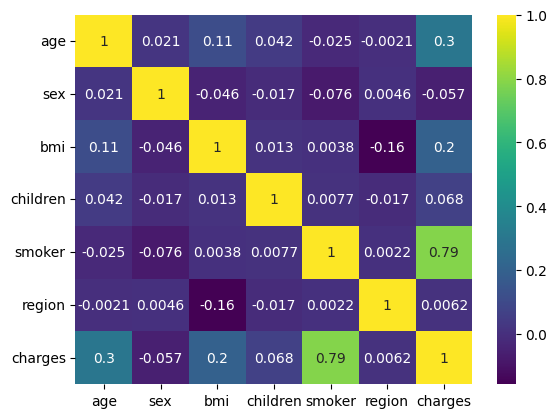

In [113]:
cor_matrix = insurance.corr()
sns.heatmap(cor_matrix, annot=True, cmap='viridis')


menentukan data x dan data y lalu membagi test dan train

In [114]:
X = insurance.drop(['charges'], axis=1)
Y = insurance['charges']

# membagi data test = 20%, training = 80%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

proses training

In [115]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, Y_train)

LinearRegression()

## train test prediction

melihat hasil train prediksi

In [116]:
training_prediction = linear_regression.predict(X_train)
train_err_score = metrics.r2_score(Y_train, training_prediction)

# display / print
"R-squared error - training: "+ str(train_err_score), "Hasil train akurasi: " + str(train_err_score*100)[:5] + "%"

('R-squared error - training: 0.7417049283233981',
 'Hasil train akurasi: 74.17%')

In [117]:
Y_pred = linear_regression.predict(X_test)

melihat hasi test prediksi

In [118]:
test_err_score = metrics.r2_score(Y_test, Y_pred)

# display / print
"R-squared error - training: "+ str(test_err_score) ,"Hasil test akurasi: " + str(test_err_score*100)[:5] + "%"

('R-squared error - training: 0.7833463107364539',
 'Hasil test akurasi: 78.33%')

menampilkan grafik linear regression

<Axes: xlabel='charges'>

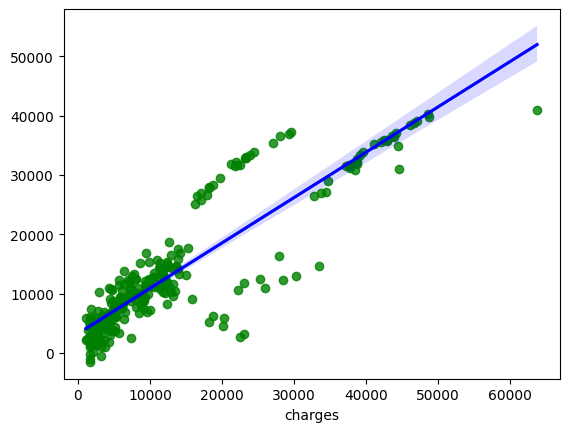

In [127]:
sns.regplot(x=X_test, y=Y_pred, scatter_kws={"color": "green"}, line_kws={"color": "blue"}) 